# Business Case: Yulu Hypothesis Testing

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter(action='ignore',category=Warning)

In [262]:
df_yulu=pd.read_csv("yulu.csv")

In [263]:
df_yulu.shape

(10886, 12)

In [264]:
df_yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [265]:
df_yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


No Missing Values in the dataset

In [266]:
df_yulu.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [267]:
df_yulu['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [268]:
df_yulu['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [269]:
df_yulu['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [270]:
df_yulu['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

<AxesSubplot:xlabel='holiday', ylabel='count'>

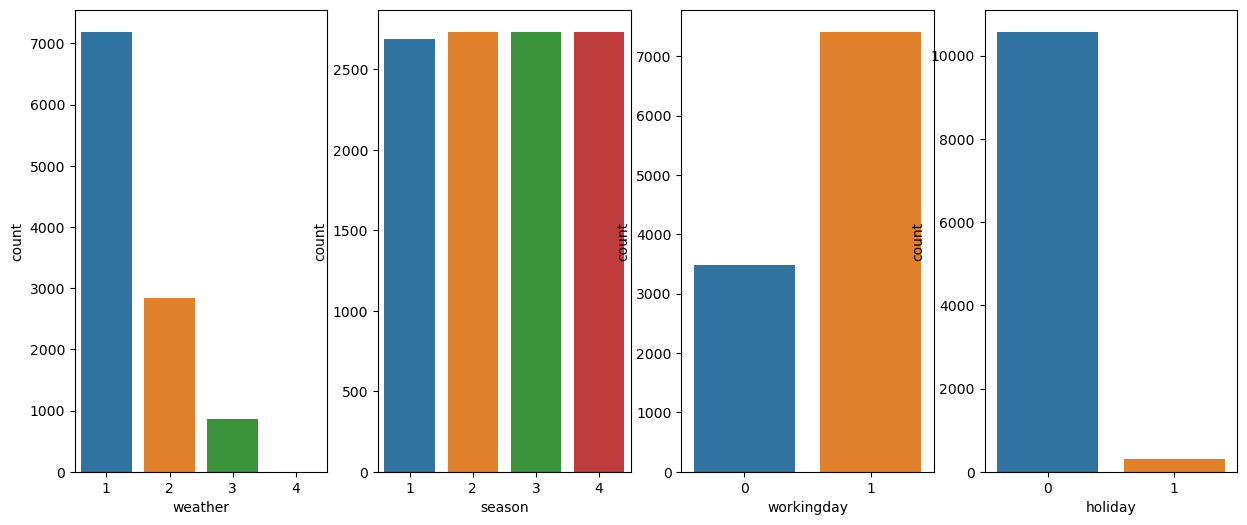

In [271]:
fig,axis=plt.subplots(1,4,figsize=(15,6))
sns.countplot(data=df_yulu,x='weather',ax=axis[0])
sns.countplot(data=df_yulu,x='season',ax=axis[1])
sns.countplot(data=df_yulu,x='workingday',ax=axis[2])
sns.countplot(data=df_yulu,x='holiday',ax=axis[3])

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

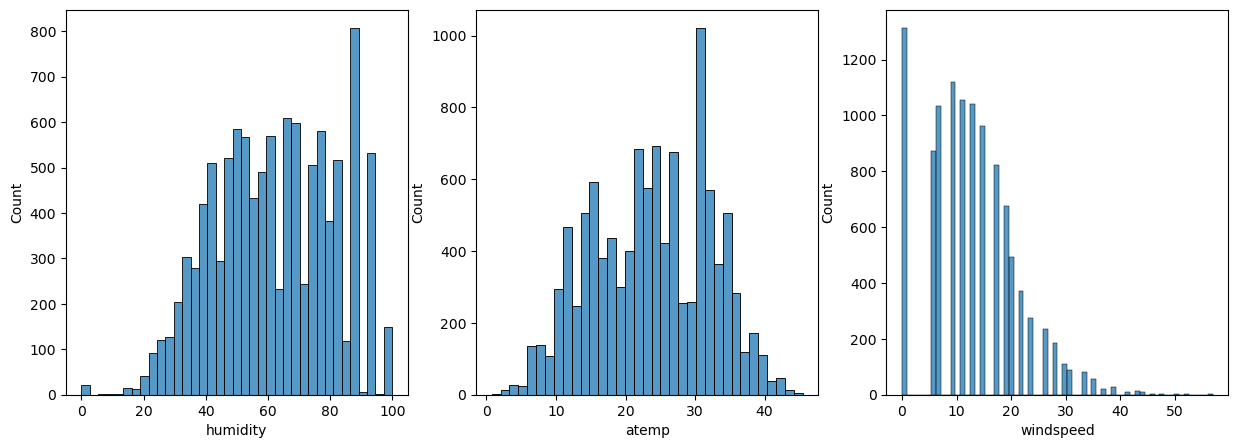

In [272]:
fig,axis=plt.subplots(1,3,figsize=(15,5))
sns.histplot(data=df_yulu,x='humidity',ax=axis[0])
sns.histplot(data=df_yulu,x='atemp',ax=axis[1])
sns.histplot(data=df_yulu,x='windspeed',ax=axis[2])

 #### Multi-Variate Analysis:Impact of Season and Weather on rented bikes

<AxesSubplot:xlabel='season', ylabel='count'>

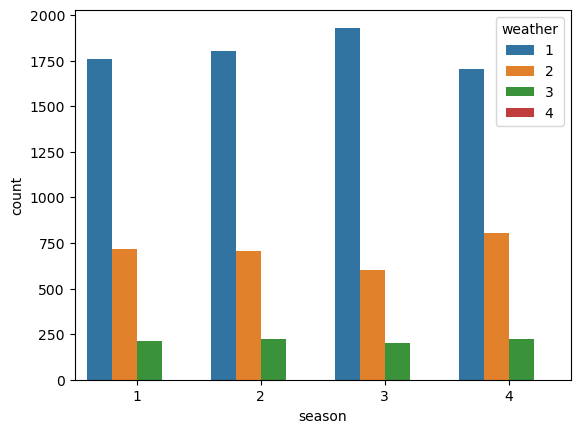

In [273]:
sns.countplot(data=df_yulu,x='season',hue='weather')

### Impact of Working day on the no. of cycles rented

<AxesSubplot:xlabel='workingday', ylabel='count'>

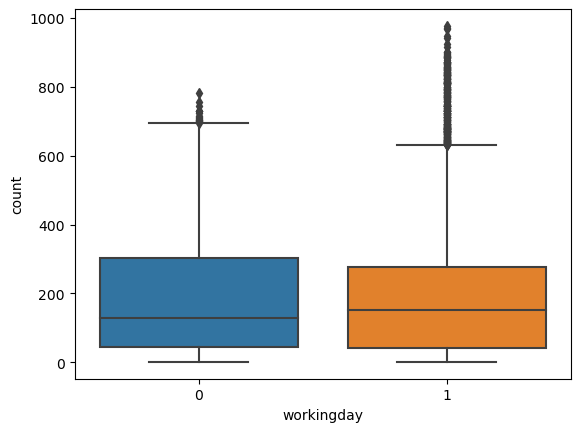

In [274]:
sns.boxplot(data=df_yulu,y='count',x='workingday')

It seems that the no. of cycles rented on a working day is slightly higher than on a non-working day.

Let us conduct a two sample right-tailed T-test on the data:
-  Ho: No. of cycles rented on a working day is either equal to or less than the no. of cycles rented on a non-working day
-  Ha: No. of cycles rented on a working day is higher than no. of cycles rented on a non-working day

In [275]:
df_yulu.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


As the data is imbalanced, equal sample distribution is required to get accurate results from statistical test

In [276]:
working=df_yulu[df_yulu['workingday']==1]['count'].sample(3474)
non_working=df_yulu[df_yulu['workingday']==0]['count'].sample(3474)

In [277]:
from scipy.stats import ttest_ind
t_stat,p_value=ttest_ind(working,non_working,equal_var=False,alternative='greater')

In [278]:
p_value

0.4504025807356144

Considering the alpha=0.05:\
As the p-value is not <0.05,we fail to reject the null hypothesis i.e cycles rented on a working day is either equal to or less than cycles rented on a non-working day.

### Impact of Holiday on the no. of cycles rented

<AxesSubplot:xlabel='holiday', ylabel='count'>

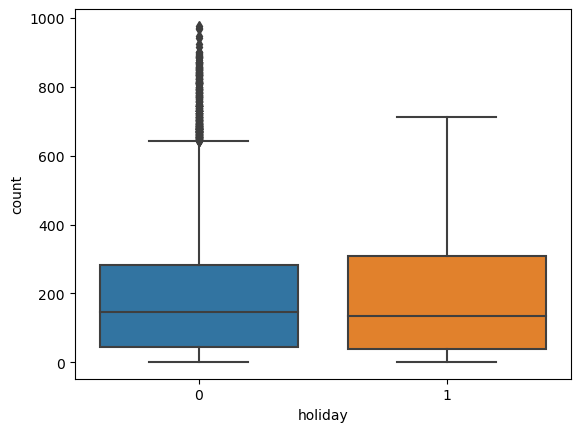

In [279]:
sns.boxplot(data=df_yulu,y='count',x='holiday')

It seems that the no. of cycles rented on a non-holiday is slightly higher than on a holiday.

Let us conduct a two sample right-tailed T-test on the data:
-  Ho: No. of cycles rented on a non-holiday is equal to or less than the no. of cycles rented on a holiday
-  Ha: No. of cycles rented on a non-holiday is higher than no. of cycles rented on a holiday

In [280]:
df_yulu.groupby('holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


In [281]:
holiday=df_yulu[df_yulu['holiday']==1]['count'].sample(310)
non_holiday=df_yulu[df_yulu['holiday']==0]['count'].sample(310)

In [282]:
from scipy.stats import ttest_ind
t_stat,p_value=ttest_ind(non_holiday,holiday,equal_var=False,alternative='greater')

In [283]:
p_value

0.5541601926669494

Considering the alpha=0.05:\
As the p-value is not <0.05,we fail to reject the null hypothesis i.e cycles rented on a non-holiday is either equal to or less than cycles rented on a holiday.

### Impact of Weather on No. of Cycles rented:
1: Clear, Few clouds, partly cloudy\
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

<AxesSubplot:xlabel='weather', ylabel='count'>

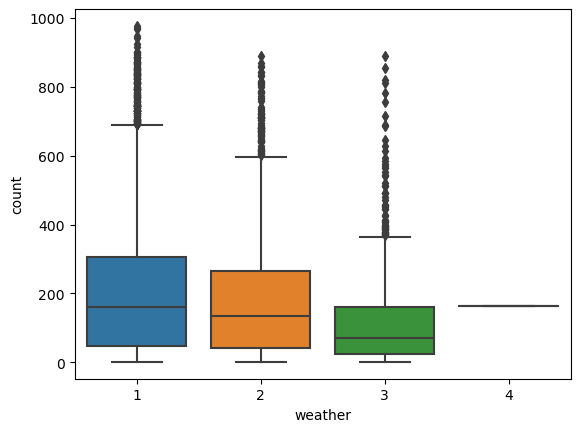

In [284]:
sns.boxplot(data=df_yulu,y='count',x='weather')

From the above diagram, weather seems to have an impact on the no. of cycles rented.\
ANOVA(Analysis of Variance) test seems suitable for the same.\
But before proceeding for the same, let's check the assumptions of ANOVA first.

###### Checking Assumptions of ANOVA(Normality and Equal Variance):

In [285]:
df_yulu.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


We are not taking weather no. 4 into consideration as the no of observations are very less and the analysis will not provide any reliable results. 

In [286]:
w1=df_yulu[df_yulu['weather']==1]['count'].sample(800)
w2=df_yulu[df_yulu['weather']==2]['count'].sample(800)
w3=df_yulu[df_yulu['weather']==3]['count'].sample(800)

**1. Normality Test**

**a. Checking Normality of the data distributions w1,w2 and w3 using Histogram:**

<AxesSubplot:xlabel='count', ylabel='Density'>

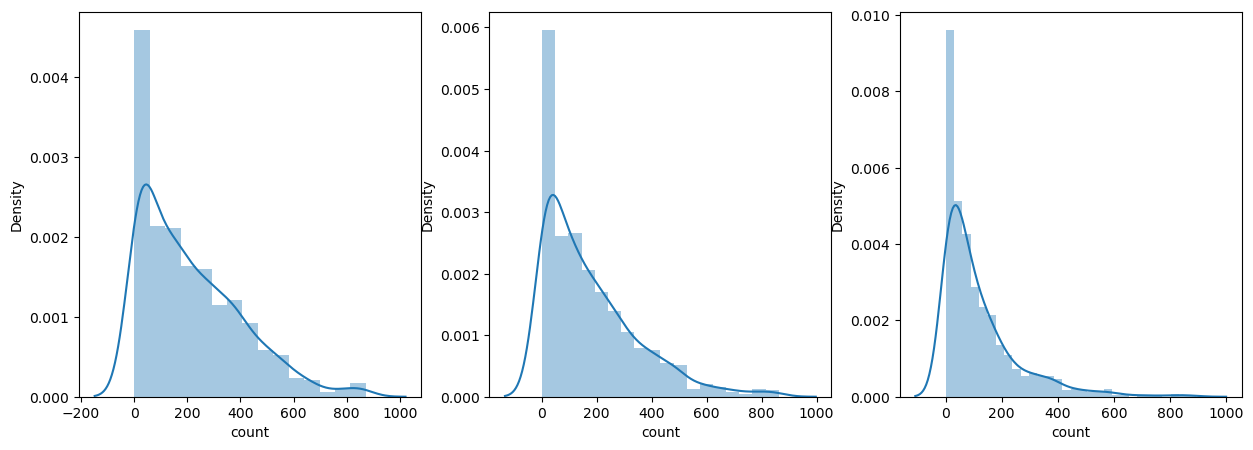

In [287]:
fig,axis=plt.subplots(1,3,figsize=(15,5))
sns.distplot(w1,ax=axis[0])
sns.distplot(w2,ax=axis[1])
sns.distplot(w3,ax=axis[2])

Let us check whether w1,w2,w3 are log normal distributions:

<AxesSubplot:xlabel='count', ylabel='Density'>

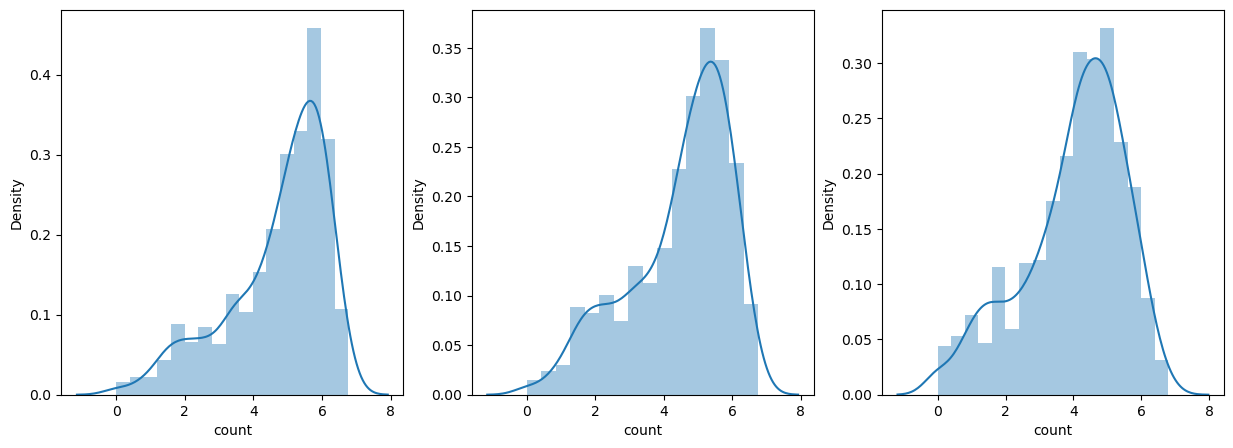

In [288]:
fig,axis=plt.subplots(1,3,figsize=(15,5))
sns.distplot(np.log(w1),ax=axis[0])
sns.distplot(np.log(w2),ax=axis[1])
sns.distplot(np.log(w3),ax=axis[2])

**b. Checking Normality of the data distributions w1,w2 and w3 using Q-Q plot:**

In [289]:
from statsmodels.api import qqplot

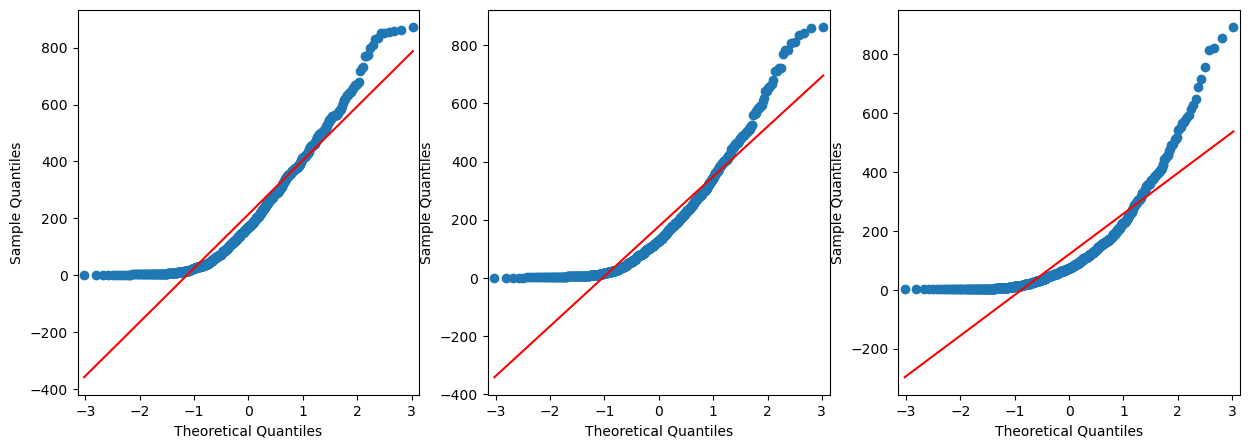

In [290]:
fig,axis=plt.subplots(1,3,figsize=(15,5))
qqplot(w1,line="s",ax=axis[0])
qqplot(w2,line="s",ax=axis[1])
qqplot(w3,line="s",ax=axis[2])
plt.show()

**c. Checking Normality of the data distributions w1,w2 and w3 using Shapiro-Wilk Test:**

Hypothesis for Shapiro-Wilk Test:
-  Ho:Data is Gaussian
-  Ha:Data is not Gaussian

In [291]:
from scipy.stats import shapiro

In [292]:
stat1,p_val1=shapiro(w1)
stat2,p_val2=shapiro(w2)
stat3,p_val3=shapiro(w3)

In [293]:
if(p_val1<0.05):
 print("W1 is not Gaussian")
if(p_val2<0.05):
 print("W2 is not Gaussian")
if(p_val3<0.05):
 print("W3 is not Gaussian")

W1 is not Gaussian
W2 is not Gaussian
W3 is not Gaussian


**2. Equal Variance Test**

Checking Equal Variance using Levene Test:
-  Ho: w1,w2,w3 have equal variance
-  Ha: w1,w2,w3 does not have equal variance

In [294]:
from scipy.stats import levene
stat,p_val=levene(w1,w2,w3)

In [295]:
if(p_val<0.05): 
    print("w1,w2 and w3 have equal variance")

w1,w2 and w3 have equal variance


As the assumptions of ANOVA is failing, lets go for Kruskal Wallis Test:


**Kruskal Wallis Test:**
-  Ho: All groups have the same median
-  Ha: Atleast one of the groups w1,w2 and w3 has a different median

In [296]:
from scipy.stats import kruskal
stat,p_val=kruskal(w1,w2,w3)

In [297]:
if(p_val<0.05):
    print("weather has an impact on the no of cycles rented")

weather has an impact on the no of cycles rented


Even if assumptions of ANOVA are failing, let's check with ANOVA too:

**ANOVA Test:**
-  Ho: All groups have the same mean i.e., No. of cycles rented are same in different weather
-  Ha: Atleast one of the groups w1,w2 and w3 has a different mean i.e., No. of cyles rented are different in  different weather

In [298]:
from scipy.stats import f_oneway
stat,p_val=f_oneway(w1,w2,w3)

In [299]:
if(p_val<0.05):
    print("weather has an impact on the no of cycles rented")

weather has an impact on the no of cycles rented


### Impact of Season on No. of Cycles rented: (1: spring, 2: summer, 3: fall, 4: winter)

<AxesSubplot:xlabel='season', ylabel='count'>

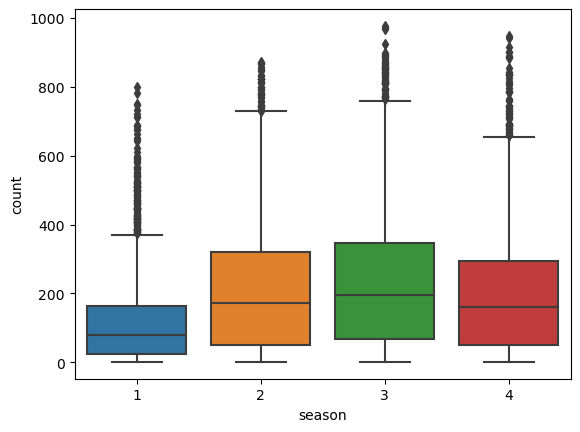

In [300]:
sns.boxplot(data=df_yulu,y='count',x='season')

From the above diagram, season seems to have an impact on the no. of cycles rented.\
ANOVA(Analysis of Variance) test seems suitable for the same.\
But before proceeding for the same, let's check the assumptions of ANOVA first.

###### Checking Assumptions of ANOVA(Normality and Equal Variance):

In [301]:
df_yulu.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [302]:
s1=df_yulu[df_yulu['season']==1]['count'].sample(2680)
s2=df_yulu[df_yulu['season']==2]['count'].sample(2680)
s3=df_yulu[df_yulu['season']==3]['count'].sample(2680)
s4=df_yulu[df_yulu['season']==4]['count'].sample(2680)

**1. Normality Test**

**a. Checking Normality of the data distributions s1,s2,s3 and s4 using Histogram:**

<AxesSubplot:xlabel='count', ylabel='Density'>

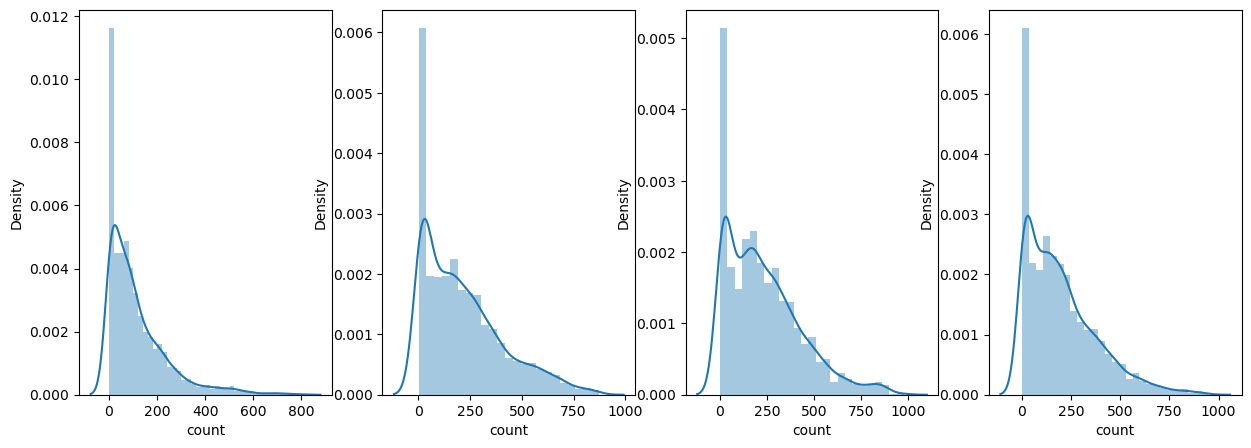

In [303]:
fig,axis=plt.subplots(1,4,figsize=(15,5))
sns.distplot(s1,ax=axis[0])
sns.distplot(s2,ax=axis[1])
sns.distplot(s3,ax=axis[2])
sns.distplot(s4,ax=axis[3])

Let us check whether s1,s2,s3,and s4 are log normal distributions:

<AxesSubplot:xlabel='count', ylabel='Density'>

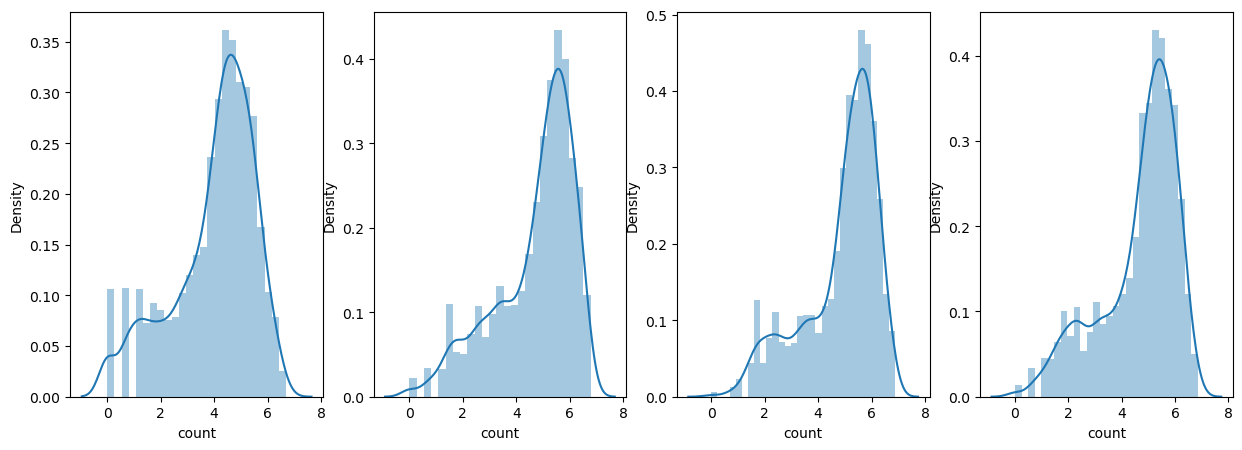

In [304]:
fig,axis=plt.subplots(1,4,figsize=(15,5))
sns.distplot(np.log(s1),ax=axis[0])
sns.distplot(np.log(s2),ax=axis[1])
sns.distplot(np.log(s3),ax=axis[2])
sns.distplot(np.log(s4),ax=axis[3])

**b. Checking Normality of the data distributions s1,s2,s3 and s4 using Q-Q plot:**

In [305]:
from statsmodels.api import qqplot

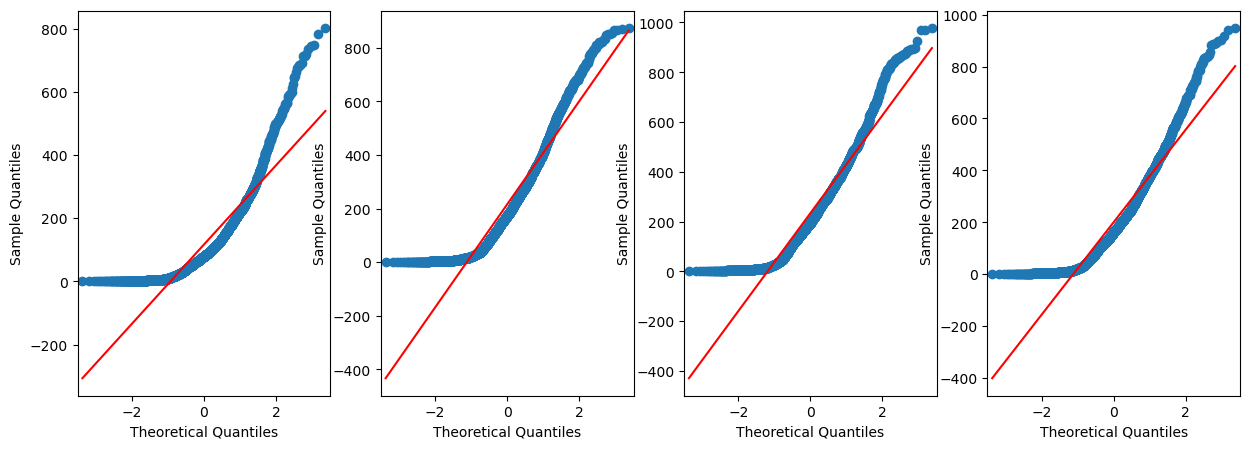

In [306]:
fig,axis=plt.subplots(1,4,figsize=(15,5))
qqplot(s1,line="s",ax=axis[0])
qqplot(s2,line="s",ax=axis[1])
qqplot(s3,line="s",ax=axis[2])
qqplot(s4,line="s",ax=axis[3])
plt.show()

**c. Checking Normality of the data distributions s1,s2,s3 and s4 using Shapiro-Wilk Test:**

Hypothesis for Shapiro-Wilk Test:
-  Ho:Data is Gaussian
-  Ha:Data is not Gaussian

In [307]:
from scipy.stats import shapiro

In [308]:
stat1,p_val1=shapiro(s1)
stat2,p_val2=shapiro(s2)
stat3,p_val3=shapiro(s3)
stat4,p_val4=shapiro(s4)

In [321]:
if(p_val1<0.05):
 print("s1 is not Gaussian")
if(p_val2<0.05):
 print("s2 is not Gaussian")
if(p_val3<0.05):
 print("s3 is not Gaussian")
if(p_val4<0.05):
 print("s4 is not Gaussian")

s1 is not Gaussian
s2 is not Gaussian
s3 is not Gaussian
s4 is not Gaussian


**2. Equal Variance Test**

Checking Equal Variance using Levene Test:
-  Ho: s1,s2,s3,s4 have equal variance
-  Ha: s1,s2,s3,s4 does not have equal variance

In [310]:
from scipy.stats import levene
stat,p_val=levene(s1,s2,s3,s4)

In [311]:
if(p_val<0.05): 
    print("s1,s2,s3 and s4 have equal variance")

s1,s2,s3 and s4 have equal variance


One of the assumptions of ANOVA(normality of the distributions) is failing, but let's assume the distributions are normal and go ahead with ANOVA test

**ANOVA Test:**
-  Ho: All groups have the same mean i.e., No. of cycles rented are same in different season
-  Ha: Atleast one of the groups s1,s2,s3 and s4 has a different mean i.e., No. of cyles rented are different in  different season

In [312]:
from scipy.stats import f_oneway
stat,p_val=f_oneway(s1,s2,s3,s4)

In [313]:
if(p_val<0.05):
    print("season has an impact on the no of cycles rented")

season has an impact on the no of cycles rented


As one of the assumptions of ANOVA is failing, lets check with Kruskal Wallis test also:

**Kruskal Wallis Test:**
-  Ho: All groups have the same median
-  Ha: Atleast one of the groups s1,s2,s3 and s4 has a different median

In [314]:
from scipy.stats import kruskal
stat,p_val=kruskal(s1,s2,s3,s4)

In [315]:
if(p_val<0.05):
    print("season has an impact on the no of cycles rented")

season has an impact on the no of cycles rented


## Chi-square Test to check weather is dependent on season or not:
-  Ho: Weather and Season are independent
-  Ha: Weather and Season are dependent on each other

In [316]:
from scipy.stats import chi2_contingency

In [317]:
df=pd.crosstab(df_yulu['weather'],df_yulu['season'])

In [318]:
stat,p_val,df,exp_f=chi2_contingency(df)

In [319]:
if(p_val<0.05):
    print("Weather and Season are dependent on each other")
else:
    print("Weather and Season are independent")

Weather and Season are dependent on each other


###### Checking correlation  between features:

In [320]:
df_yulu[['humidity','temp','atemp','windspeed','count']].corr()

,humidity,temp,atemp,windspeed,count
humidity,1.000000,-0.064949,-0.043536,-0.318607,-0.317371
temp,-0.064949,1.000000,0.984948,-0.017852,0.394454
atemp,-0.043536,0.984948,1.000000,-0.057473,0.389784
windspeed,-0.318607,-0.017852,-0.057473,1.000000,0.101369
count,-0.317371,0.394454,0.389784,0.101369,1.000000


## Insights: 

1.As per the data provided, cycles rented on a non-working day are similar to the cycles rented on a working day\
2.Cycles rented on a non-holiday are similar to cycles rented on a holiday\
3.Weather plays an important role on the number of cycles rented. Most number of bikes are rented in case of 1 i.e clear or partly cloudy weather.Least no of cycles are rented in case of weather 4 i.e. heavy rain,ice pallets,thunderstorm.\
4.Weather is dependent on season.\
5.Season also plays an important role on the number of cycles rented.

## Recommendation:

1.Inventory of bikes can be planned based on weather. More no of bikes can be placed in regions where weather is most suitable for renting bikes.Less no. of bikes can be deployed in regions where there are higher chances of bad weather,i.e heavy rain,ice pellets,thunderstorm.\
2.Promotional discounts can be offered for weather no. 2 i.e.,misty and cloudy because the weather is almost suitable for riding bikes and because of the discounts offered, sales might increase.\
3.Maintenance activities for bikes can be planned on days when there are higher chances of bad weather.\
4.Special discounts can be provided for seasons when there are less no. of electric cycles rented.\
5.Although the data does not show any difference in the no. of cycles for a working day or a holiday. But in the future,these two factors can be observed as intuitively there is a higher chance of more no. of cycles rented on a working-day or a non-holiday.Promotional offers can be planned based on these two factors as well.
